## 1. Import Libraries

In [100]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import json
import requests

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

import seaborn as sns
sns.set()

from tabulate import tabulate
%matplotlib inline
plt.style.use("Solarize_Light2")

## 2. Import the Dataset

### Read json file from URA API for Machine Learning Project Dataset

In [101]:
# Read json file 
df = pd.read_json('C:/Users/raufy/Downloads/2.2 Current Work - Project/Proj_5 - Machine Learning/ptd_pty_apr_22.json')
#df

In [102]:
import json
 
# Opening JSON file
f = open('C:/Users/raufy/Downloads/2.2 Current Work - Project/Proj_5 - Machine Learning/ptd_pty_apr_22.json')
 
# returns JSON object as a dictionary
data = json.load(f)
#data

#df = pd.DataFrame(data["Result"])
#df
 
# Closing file
#f.close()

In [103]:
# Compile the data['Result'] list using json_normalize
pd.json_normalize(data['Result'])

,street,project,transaction,marketSegment,x,y
0,ZEHNDER ROAD,LANDED HOUSING DEVELOPMENT,"[{'area': '524.3', 'floorRange': '-', 'noOfUni...",RCR,NaN,NaN
1,NEO PEE TECK LANE,LANDED HOUSING DEVELOPMENT,"[{'area': '159.3', 'floorRange': '-', 'noOfUni...",RCR,NaN,NaN
2,COVE DRIVE,TURQUOISE,"[{'area': '224', 'floorRange': '01-05', 'noOfU...",CCR,28382.47067,25008.33592
3,BUKIT TERESA ROAD,LANDED HOUSING DEVELOPMENT,"[{'area': '178.3', 'floorRange': '-', 'noOfUni...",RCR,NaN,NaN
4,ALEXANDRA VIEW,ARTRA,"[{'area': '77', 'floorRange': '21-25', 'noOfUn...",RCR,26204.50079,30270.56219
...,...,...,...,...,...,...
292,COVE GROVE,LANDED HOUSING DEVELOPMENT,"[{'area': '903.5', 'floorRange': '-', 'noOfUni...",CCR,NaN,NaN
293,ALEXANDRA VIEW,THE METROPOLITAN CONDOMINIUM,"[{'area': '132', 'floorRange': '16-20', 'noOfU...",RCR,26074.4211,30319.95369
294,WESTRIDGE WALK,LANDED HOUSING DEVELOPMENT,"[{'area': '214.1', 'floorRange': '-', 'noOfUni...",RCR,NaN,NaN
295,KIM TIAN ROAD,HIGHLINE RESIDENCES,"[{'area': '84', 'floorRange': '16-20', 'noOfUn...",RCR,27603.58591,29605.2519


In [104]:
# Compile the pty list using json_normalize
df_compiled_pty = pd.json_normalize(data['Result'], record_path=['transaction'],
                                    meta=['street', 'project', 'marketSegment'])
df_compiled_pty.head()

,area,floorRange,noOfUnits,contractDate,typeOfSale,price,propertyType,district,typeOfArea,tenure,nettPrice,street,project,marketSegment
0,524.3,-,1,0220,3,5500000,Semi-detached,05,Land,Freehold,NaN,ZEHNDER ROAD,LANDED HOUSING DEVELOPMENT,RCR
1,308,-,1,0918,3,5000000,Semi-detached,05,Land,Freehold,NaN,ZEHNDER ROAD,LANDED HOUSING DEVELOPMENT,RCR
2,314,-,1,0618,3,4750000,Semi-detached,05,Land,Freehold,NaN,ZEHNDER ROAD,LANDED HOUSING DEVELOPMENT,RCR
3,308,-,1,0921,3,5200000,Semi-detached,05,Land,Freehold,NaN,ZEHNDER ROAD,LANDED HOUSING DEVELOPMENT,RCR
4,159.3,-,1,0320,3,2630000,Terrace,05,Land,Freehold,NaN,NEO PEE TECK LANE,LANDED HOUSING DEVELOPMENT,RCR


In [105]:
# Print a summary of the dataframe
df_compiled_pty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24744 entries, 0 to 24743
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   area           24744 non-null  object
 1   floorRange     24744 non-null  object
 2   noOfUnits      24744 non-null  object
 3   contractDate   24744 non-null  object
 4   typeOfSale     24744 non-null  object
 5   price          24744 non-null  object
 6   propertyType   24744 non-null  object
 7   district       24744 non-null  object
 8   typeOfArea     24744 non-null  object
 9   tenure         24744 non-null  object
 10  nettPrice      188 non-null    object
 11  street         24744 non-null  object
 12  project        24744 non-null  object
 13  marketSegment  24744 non-null  object
dtypes: object(14)
memory usage: 2.6+ MB


### Converting object into float or integers within the dataset

In [106]:
# Convert String to float64 - Area
df_compiled_pty['area'] = df_compiled_pty['area'].str.replace('%','').astype(np.float64)

In [107]:
# Convert String to int32 - Number of Units
df_compiled_pty['noOfUnits'] = df_compiled_pty['noOfUnits'].str.replace(',','').astype(int)

In [108]:
# Convert String to int32 - typeOfSale       
df_compiled_pty['typeOfSale'] = df_compiled_pty['typeOfSale'].str.replace(',','').astype(int)

In [109]:
# Convert String to int32 - price                   
df_compiled_pty['price'] = df_compiled_pty['price'].str.replace(',','').astype(int)

In [110]:
# Convert String to int32 - district                            
df_compiled_pty['district'] = df_compiled_pty['district'].str.replace(',','').astype(int)

In [111]:
# Print a summary of the dataframe
df_compiled_pty.dtypes

area             float64
floorRange        object
noOfUnits          int32
contractDate      object
typeOfSale         int32
price              int32
propertyType      object
district           int32
typeOfArea        object
tenure            object
nettPrice         object
street            object
project           object
marketSegment     object
dtype: object

### Format to month and year for the date

In [112]:
#format to month and year for the Date of Sale
df_compiled_pty['contractDate'] = pd.to_datetime(df_compiled_pty['contractDate'], format='%m%y')

In [113]:
# Perform inserting Year into dataframe
df_compiled_pty['Year'] = df_compiled_pty['contractDate'].dt.year

In [114]:
# Performing inserting Month into dataframe
df_compiled_pty['Month'] = df_compiled_pty['contractDate'].dt.month
df_compiled_pty.head()

,area,floorRange,noOfUnits,contractDate,typeOfSale,price,propertyType,district,typeOfArea,tenure,nettPrice,street,project,marketSegment,Year,Month
0,524.3,-,1,2020-02-01,3,5500000,Semi-detached,5,Land,Freehold,NaN,ZEHNDER ROAD,LANDED HOUSING DEVELOPMENT,RCR,2020,2
1,308.0,-,1,2018-09-01,3,5000000,Semi-detached,5,Land,Freehold,NaN,ZEHNDER ROAD,LANDED HOUSING DEVELOPMENT,RCR,2018,9
2,314.0,-,1,2018-06-01,3,4750000,Semi-detached,5,Land,Freehold,NaN,ZEHNDER ROAD,LANDED HOUSING DEVELOPMENT,RCR,2018,6
3,308.0,-,1,2021-09-01,3,5200000,Semi-detached,5,Land,Freehold,NaN,ZEHNDER ROAD,LANDED HOUSING DEVELOPMENT,RCR,2021,9
4,159.3,-,1,2020-03-01,3,2630000,Terrace,5,Land,Freehold,NaN,NEO PEE TECK LANE,LANDED HOUSING DEVELOPMENT,RCR,2020,3


### Sorting the dataset

In [115]:
# Sort the price of property in ascending order according to Year.
df_compiled_pty.sort_values(["Year"],axis=0,ascending=[True],inplace=True)

# Describe the dataset
df_compiled_pty.describe()

,area,noOfUnits,typeOfSale,price,district,Year,Month
count,24744.000000,24744.000000,24744.000000,2.474400e+04,24744.000000,24744.000000,24744.000000
mean,104.698335,1.060338,1.683398,1.923132e+06,4.163029,2019.476156,6.547325
std,559.619772,3.810907,0.942551,8.399551e+06,1.430359,1.502452,3.427499
min,30.000000,1.000000,1.000000,4.200000e+05,1.000000,2017.000000,1.000000
25%,61.000000,1.000000,1.000000,1.180000e+06,3.000000,2018.000000,4.000000
50%,82.000000,1.000000,1.000000,1.490000e+06,5.000000,2020.000000,7.000000
75%,110.000000,1.000000,3.000000,1.960000e+06,5.000000,2021.000000,9.000000
max,58460.000000,436.000000,3.000000,8.408889e+08,7.000000,2022.000000,12.000000


In [116]:
# datasets has 24744 rows and 10 columns
df_compiled_pty.shape 

(24744, 16)

In [117]:
# Check for missing entries
df_compiled_pty.isna().sum()

area                 0
floorRange           0
noOfUnits            0
contractDate         0
typeOfSale           0
price                0
propertyType         0
district             0
typeOfArea           0
tenure               0
nettPrice        24556
street               0
project              0
marketSegment        0
Year                 0
Month                0
dtype: int64

In [118]:
# Removing nettPrice
del df_compiled_pty["nettPrice"]

In [119]:
# Removing tenure
del df_compiled_pty["tenure"]

In [120]:
# Removing street
del df_compiled_pty["street"]

In [121]:
# Removing project
del df_compiled_pty["project"]

In [122]:
# Removing contractDate
del df_compiled_pty["contractDate"]

In [123]:
# Removing Month
del df_compiled_pty["Month"]

In [124]:
df_compiled_pty.head()

,area,floorRange,noOfUnits,typeOfSale,price,propertyType,district,typeOfArea,marketSegment,Year
9185,46.0,16-20,1,1,916000,Condominium,3,Strata,RCR,2017
3405,46.0,21-25,1,1,906400,Condominium,3,Strata,RCR,2017
3407,79.0,31-35,1,1,1573000,Condominium,3,Strata,RCR,2017
3409,78.0,26-30,1,1,1460640,Condominium,3,Strata,RCR,2017
3411,80.0,26-30,1,1,1498380,Condominium,3,Strata,RCR,2017


In [125]:
# Export a Pandas Dataframe to CSV 
df_compiled_pty.to_csv(r'C:/Users/raufy/OneDrive/Documents/private_pty_compiled.csv', index = False)

## 3. Visualization of Dataset

In [126]:
import seaborn as sns

In [127]:
df_compiled_pty.corr()

,area,noOfUnits,typeOfSale,price,district,Year
area,1.000000,0.978310,0.064372,0.943285,0.002143,-0.012103
noOfUnits,0.978310,1.000000,0.022117,0.930880,0.001636,-0.012013
typeOfSale,0.064372,0.022117,1.000000,0.054280,-0.168619,-0.040805
price,0.943285,0.930880,0.054280,1.000000,-0.010760,0.002598
district,0.002143,0.001636,-0.168619,-0.010760,1.000000,0.208132
Year,-0.012103,-0.012013,-0.040805,0.002598,0.208132,1.000000


<AxesSubplot:>

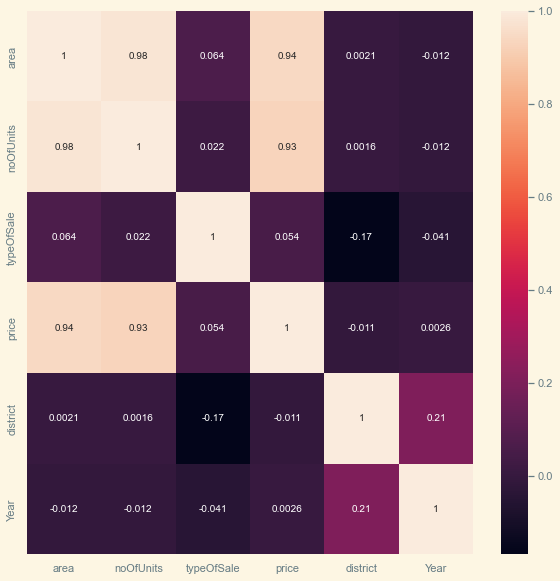

In [128]:
# Visualize features (X) against target (y)

plt.figure(figsize = (10, 10))
sns.heatmap(df_compiled_pty.corr(), annot = True)

In [129]:
# Dataframe with conditions created for better visualization 
df_price_area= df_compiled_pty[(df_compiled_pty['price'].between(0,10000000, inclusive = True) & 
                        (df_compiled_pty['area'].between(0,10000, inclusive = True)))]
df_price_area.head()

,area,floorRange,noOfUnits,typeOfSale,price,propertyType,district,typeOfArea,marketSegment,Year
9185,46.0,16-20,1,1,916000,Condominium,3,Strata,RCR,2017
3405,46.0,21-25,1,1,906400,Condominium,3,Strata,RCR,2017
3407,79.0,31-35,1,1,1573000,Condominium,3,Strata,RCR,2017
3409,78.0,26-30,1,1,1460640,Condominium,3,Strata,RCR,2017
3411,80.0,26-30,1,1,1498380,Condominium,3,Strata,RCR,2017


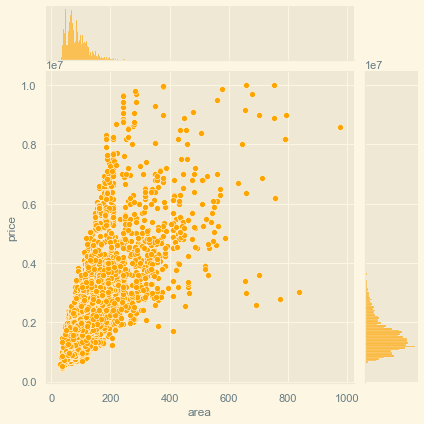

In [130]:
sns.jointplot( x = 'area', y = 'price', data = df_price_area, color = 'orange')

In [131]:
# Dataframe with conditions created for better visualization 
df_unit_u_pr = df_compiled_pty[(df_compiled_pty['price'].between(0,40000000, inclusive = True) & 
                        (df_compiled_pty['noOfUnits'].between(0,10, inclusive = True)))]
df_unit_u_pr.head()

,area,floorRange,noOfUnits,typeOfSale,price,propertyType,district,typeOfArea,marketSegment,Year
9185,46.0,16-20,1,1,916000,Condominium,3,Strata,RCR,2017
3405,46.0,21-25,1,1,906400,Condominium,3,Strata,RCR,2017
3407,79.0,31-35,1,1,1573000,Condominium,3,Strata,RCR,2017
3409,78.0,26-30,1,1,1460640,Condominium,3,Strata,RCR,2017
3411,80.0,26-30,1,1,1498380,Condominium,3,Strata,RCR,2017


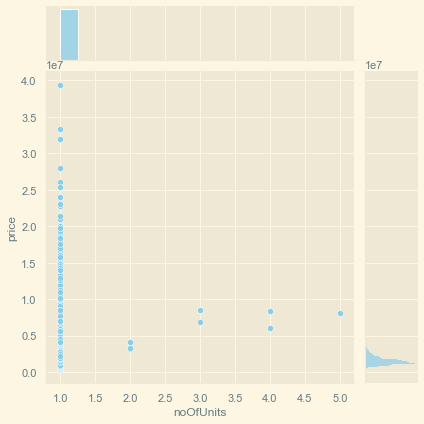

In [132]:
sns.jointplot( x = 'noOfUnits', y = 'price', data = df_unit_u_pr, color = 'skyblue')

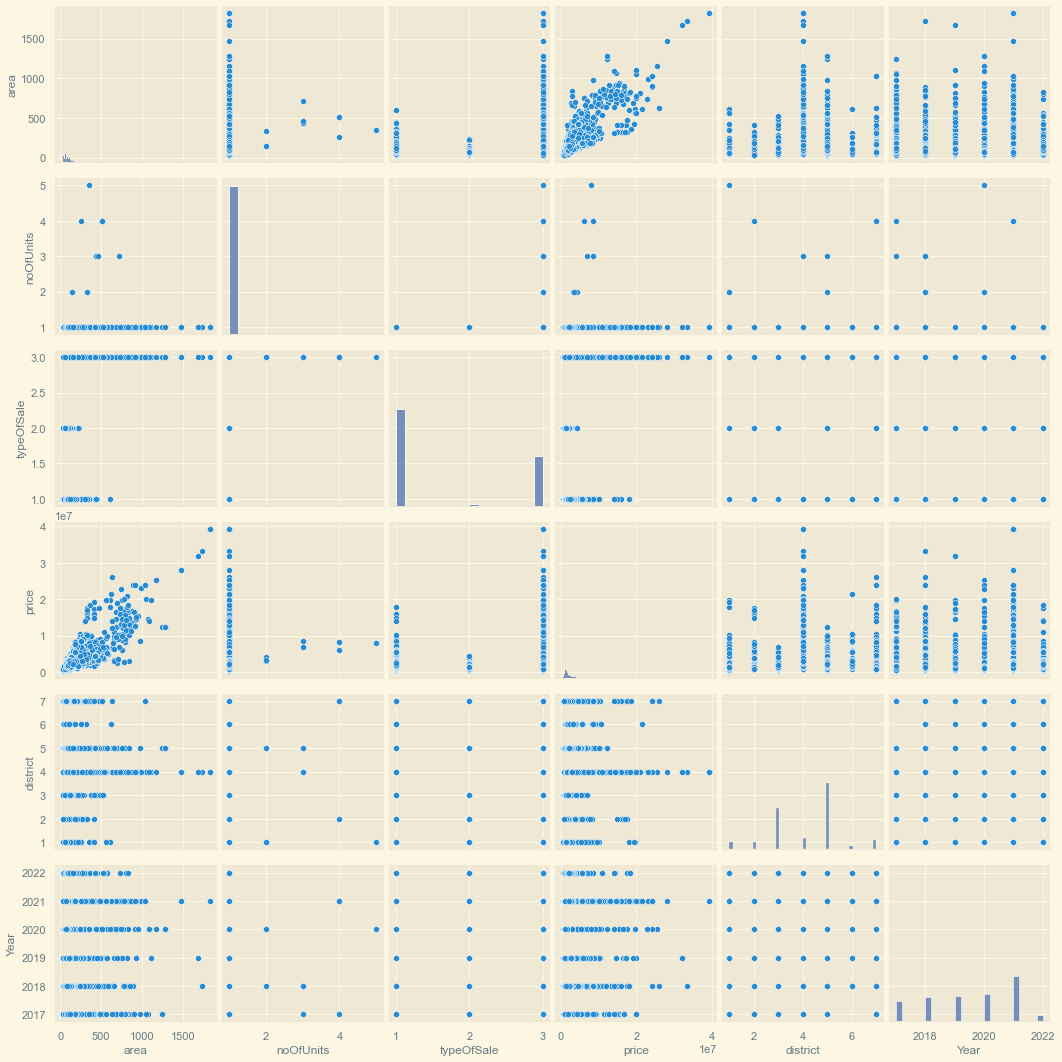

In [133]:
sns.pairplot(df_unit_u_pr)

### Checking for Outliers

In [134]:
# Average Price
print('Original Average Price:', df_unit_u_pr['price'].mean())

Original Average Price: 1784350.7789414097


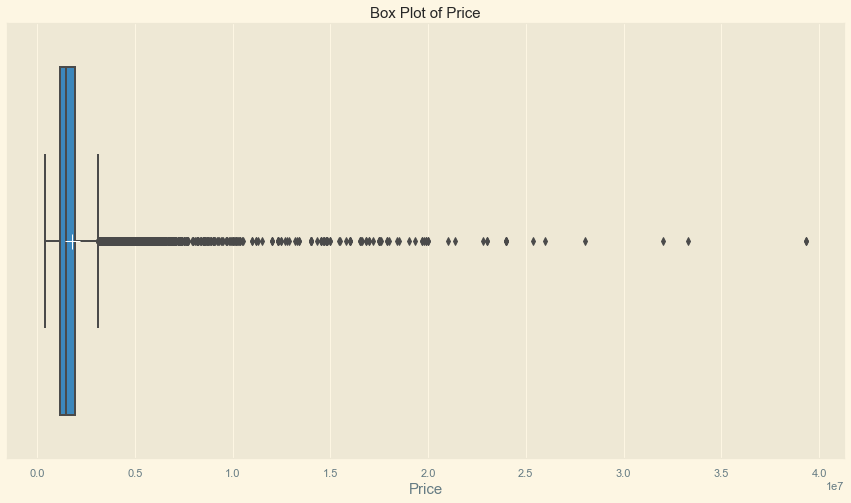

In [135]:
# box plot to check the presence of outliers
plt.figure(figsize = (15,8))

sns.boxplot(x = df_unit_u_pr['price'], showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "white",
                       "markersize": "15"})

plt.title('Box Plot of Price', fontsize = 15)
plt.xlabel('Price', fontsize = 15)
plt.show()

## 4. Label Encoding

In [136]:
pd.set_option('mode.chained_assignment', None)

In [137]:
# import the LabelEncoder
from sklearn.preprocessing import LabelEncoder

# instantiate the encoder
labelencoder = LabelEncoder()

# fit the encoder using 'fit_transform'
df_unit_u_pr['floorRange'] = labelencoder.fit_transform(df_unit_u_pr.floorRange)
df_unit_u_pr['propertyType'] = labelencoder.fit_transform(df_unit_u_pr.propertyType)
df_unit_u_pr['typeOfArea'] = labelencoder.fit_transform(df_unit_u_pr.typeOfArea)
df_unit_u_pr['marketSegment'] = labelencoder.fit_transform(df_unit_u_pr.marketSegment)
df_unit_u_pr['Year'] = labelencoder.fit_transform(df_unit_u_pr.Year)

# print the first five observations
df_unit_u_pr.head()

,area,floorRange,noOfUnits,typeOfSale,price,propertyType,district,typeOfArea,marketSegment,Year
9185,46.0,4,1,1,916000,1,3,1,2,0
3405,46.0,5,1,1,906400,1,3,1,2,0
3407,79.0,7,1,1,1573000,1,3,1,2,0
3409,78.0,6,1,1,1460640,1,3,1,2,0
3411,80.0,6,1,1,1498380,1,3,1,2,0


## 5. Standardization for Data

In [138]:
# use StandardScaler to normalize the variable
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


from sklearn.preprocessing import StandardScaler

scaled_features = df_unit_u_pr.copy()

In [139]:
col_names = ['area','floorRange', 'noOfUnits','typeOfSale', 'propertyType', 'district','typeOfArea','marketSegment', 'Year']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [140]:
scaled_features[col_names] = features
print(scaled_features)

           area  floorRange  noOfUnits  typeOfSale    price  propertyType  \
9185  -0.672032    0.189999  -0.020355   -0.724578   916000      0.683304   
3405  -0.672032    0.604069  -0.020355   -0.724578   906400      0.683304   
3407  -0.230156    1.432209  -0.020355   -0.724578  1573000      0.683304   
3409  -0.243547    1.018139  -0.020355   -0.724578  1460640      0.683304   
3411  -0.216766    1.018139  -0.020355   -0.724578  1498380      0.683304   
...         ...         ...        ...         ...      ...           ...   
4374  -0.189986   -1.052211  -0.020355   -0.724578  1778000     -0.468153   
4375   0.051037   -1.052211  -0.020355   -0.724578  2000000     -0.468153   
4376   0.051037   -1.052211  -0.020355   -0.724578  1962163     -0.468153   
18908  0.345622    0.189999  -0.020355   -0.724578  2440000     -0.468153   
12371  0.733937   -1.052211  -0.020355    1.397836  2200000      0.683304   

       district  typeOfArea  marketSegment      Year  
9185  -0.813157    0

In [141]:
df_scaled_data = pd.DataFrame(scaled_features)
df_scaled_data

,area,floorRange,noOfUnits,typeOfSale,price,propertyType,district,typeOfArea,marketSegment,Year
9185,-0.672032,0.189999,-0.020355,-0.724578,916000,0.683304,-0.813157,0.124419,0.801240,-1.648221
3405,-0.672032,0.604069,-0.020355,-0.724578,906400,0.683304,-0.813157,0.124419,0.801240,-1.648221
3407,-0.230156,1.432209,-0.020355,-0.724578,1573000,0.683304,-0.813157,0.124419,0.801240,-1.648221
3409,-0.243547,1.018139,-0.020355,-0.724578,1460640,0.683304,-0.813157,0.124419,0.801240,-1.648221
3411,-0.216766,1.018139,-0.020355,-0.724578,1498380,0.683304,-0.813157,0.124419,0.801240,-1.648221
...,...,...,...,...,...,...,...,...,...,...
4374,-0.189986,-1.052211,-0.020355,-0.724578,1778000,-0.468153,0.585229,0.124419,0.801240,1.679791
4375,0.051037,-1.052211,-0.020355,-0.724578,2000000,-0.468153,0.585229,0.124419,0.801240,1.679791
4376,0.051037,-1.052211,-0.020355,-0.724578,1962163,-0.468153,0.585229,0.124419,0.801240,1.679791
18908,0.345622,0.189999,-0.020355,-0.724578,2440000,-0.468153,0.585229,0.124419,0.801240,1.679791


## 6. Feature Importance

In [142]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

1.0.2


In [143]:
# test regression dataset
from sklearn.datasets import make_regression
# Creating two arrays for the feature and target
X = df_unit_u_pr[['area', 'noOfUnits', "floorRange", 'typeOfSale', 'propertyType', 
                  'district', 'typeOfArea', 'marketSegment','Year']]
y = df_unit_u_pr['price']
# summarize the dataset
print(X.shape, y.shape)

(24731, 9) (24731,)


Feature: 0, Score: 16802.70047
Feature: 1, Score: 151945.56078
Feature: 2, Score: 47183.82364
Feature: 3, Score: -123567.43245
Feature: 4, Score: -150722.68330
Feature: 5, Score: -83135.85177
Feature: 6, Score: -374800.13305
Feature: 7, Score: -149879.61469
Feature: 8, Score: 90066.88282


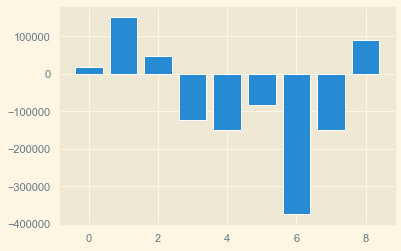

In [144]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X = df_unit_u_pr[['area', 'noOfUnits', "floorRange", 'typeOfSale', 'propertyType', 
                  'district', 'typeOfArea', 'marketSegment', 'Year']]
y = df_unit_u_pr['price']
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## 7. Create Test and Train dataset - Linear Regression

In [145]:
# Instantiating a LinearRegression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()  

In [146]:
### Divide the data into "attributes(Features)"(X) and "labels"(Y)

#X = [row,column]
# X = data.iloc[:, :-1].values
# y = data.iloc[:, 1].values

In [147]:
# Creating two arrays for the feature and target
X = df_scaled_data[['area', 'noOfUnits', 'Year']]
y = df_scaled_data['price']

In [148]:
# Checking the type of our arrays
print('The type of X is ', type(X))
print('The type of y is ', type(y))


The type of X is  <class 'pandas.core.frame.DataFrame'>
The type of y is  <class 'pandas.core.series.Series'>


In [149]:
# Splitting the datasets into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.2, random_state =7)

In [150]:
len(X_test)

19785

## 8. Train a Linear Regression Model on Train Set

In [151]:
# Fitting our model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                 normalize='deprecated', positive=False)

In [152]:
# Printing coefficients and intercept
print(model.coef_)
print(model.intercept_)


[1226884.43051913       0.          130858.73732476]
1783564.9639909728


## 9. Visualize the Performance of Model Output

In [153]:
y_predict = model.predict(X_test)

Text(0.5, 1.0, 'Multiple Linear Regression Predictions')

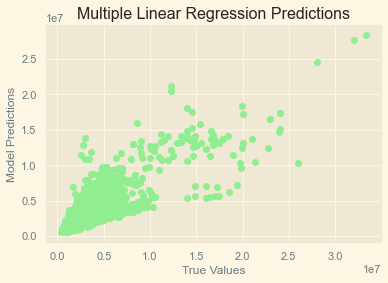

In [154]:
# Visualize the performance of model output of predicted y values against the true y values of test set.
plt.scatter(y_test,y_predict, color ='lightgreen')
plt.ylabel('Model Predictions')
plt.xlabel('True Values')
plt.title('Multiple Linear Regression Predictions')

## 10. Model Evaluation

### Compute the performance on test set using metrics r2_score, RMSE, MAE.

In [155]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = X_test.shape[1] # store no. of features as k
n = len(X_test) # store no. of rows as n

In [156]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))

MAE = mean_absolute_error(y_test, y_predict)

r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)   

print('Root Mean Squared Error =',RMSE, '\nMean Absolute Error =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


Root Mean Squared Error = 725976.994 
Mean Absolute Error = 376525.7147655848 
R2 = 0.7218851344560228 
Adjusted R2 = 0.7218429553651461


### Collect the coefficients and store them into dataframe.

In [157]:
cdf = pd.DataFrame(model.coef_, X.columns, columns=['Coefficients'])
cdf

,Coefficients
area,1.226884e+06
noOfUnits,0.000000e+00
Year,1.308587e+05


In [158]:
intercept = model.intercept_
intercept

1783564.9639909728

### Testing The Model 

In [159]:
# test the model on the test data, store the prediction results to y_pred
y_pred = model.predict(X_test)

## 11. Regularization

In [160]:
import sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet 
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn import metrics

#from mlxtend.math import num_combinations

In [161]:
# Splitting the datasets into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.2, random_state =7)

### Linear Regression

In [162]:
# Fit the linear regression model to train set

model_LR = LinearRegression()
model_LR.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                 normalize='deprecated', positive=False)

In [163]:
# predict on test set using X_test to get predicted y values

LR_y = model_LR.predict(X_test)

In [164]:
# MAE of Y_test (actual y) against predicted y

metrics.mean_absolute_error(y_test , LR_y)

376525.7147655848

In [165]:
# R2 score
metrics.r2_score(y_test , LR_y)*100

72.18851344560228

### Lasso

In [166]:
model_Lasso = Lasso(alpha= 0.7 )

In [167]:
model_Lasso.fit(X_train , y_train)

Lasso(alpha=0.7, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize='deprecated', positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [168]:
Lasso_y = model_Lasso.predict(X_test)

In [169]:
metrics.mean_absolute_error(y_test , Lasso_y)

376525.53739640425

In [170]:
metrics.r2_score(y_test , Lasso_y)*100

72.18851779661738

### Ridge

In [171]:
model_Ridge = Ridge(alpha= 0.3)

In [172]:
model_Ridge.fit(X_train , y_train)

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
      normalize='deprecated', positive=False, random_state=None, solver='auto',
      tol=0.001)

In [173]:
Ridge_y = model_Ridge.predict(X_test)

In [174]:
metrics.mean_absolute_error(y_test , Ridge_y)

376517.69608898304

In [175]:
metrics.r2_score(y_test , Ridge_y)*100

72.18889644744688

### Elastic

In [176]:
model_Elas = ElasticNet(alpha= 0.2 , l1_ratio= 0.4)

In [177]:
model_Elas.fit(X_train , y_train)

ElasticNet(alpha=0.2, copy_X=True, fit_intercept=True, l1_ratio=0.4,
           max_iter=1000, normalize='deprecated', positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [178]:
Elas_y = model_Elas.predict(X_test)

In [179]:
metrics.mean_absolute_error(y_test , Elas_y)

367549.04004165356

In [180]:
metrics.r2_score(y_test , Elas_y)*100

72.05262578014838

In [181]:
# .coef_ is an attribute of a model_Ridge object

model_Ridge.coef_


array([1226814.24936298,       0.        ,  130850.50579475])

In [182]:
coef = model_Ridge.coef_

# Store coefficients and their names in dataframe
pd.DataFrame([coef], columns = X.columns)

,area,noOfUnits,Year
0,1.226814e+06,0.0,130850.505795


In [183]:
# creating a DataFrame
dict_regularization = {'Regularization' : ['Mean Absolute Error (MAE) ', 'R2 Score'],
        'Linear Regression' : ["376525.7147655848", "72.18851344560228"],
        'Lasso' : ["376525.53739640425", "72.18851779661738"],
        'Ridge' : ["376517.69608898304", "72.18889644744688"],
        'Elastic' : ["367549.04004165356", "72.05262578014838"],
        
       }
dataframe3 = pd.DataFrame(dict_regularization)

  
# displaying the DataFrame
dataframe3
dataframe3.style.background_gradient()

#dataframe1.style.highlight_max(color = 'lightgreen', axis = 0)
#print(tabulate(dataframe1, headers = 'keys', tablefmt = 'pretty'))

,Regularization,Linear Regression,Lasso,Ridge,Elastic
0,Mean Absolute Error (MAE),376525.7147655848,376525.53739640425,376517.69608898304,367549.04004165356
1,R2 Score,72.18851344560228,72.18851779661738,72.18889644744688,72.05262578014838


## 12. Forward Selection

In [184]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [185]:
sfs = SFS(model_Elas, 
          k_features=3, 
          forward=True, 
          scoring='r2',   # default is r2 (reg) and accuracy (classf)
          cv=3)

In [186]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [187]:
sfs = sfs.fit(X_train, y_train)

In [188]:
sfs.k_feature_names_

('area', 'noOfUnits', 'Year')

In [189]:
print('\nSelected feature indices:', sfs.k_feature_idx_)
print('CV Score:', sfs.k_score_)


Selected feature indices: (0, 1, 2)
CV Score: 0.7388404124864817


In [190]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[0.7445800328578625, 0.753613830587015, 0.6913...",0.729862,"(area,)",0.0617732,0.0274507,0.0194106
2,"(0, 2)","[0.7513735004570008, 0.7627997482869953, 0.702...",0.73884,"(area, Year)",0.0590088,0.0262223,0.018542
3,"(0, 1, 2)","[0.7513735004570008, 0.7627997482869953, 0.702...",0.73884,"(area, noOfUnits, Year)",0.0590088,0.0262223,0.018542


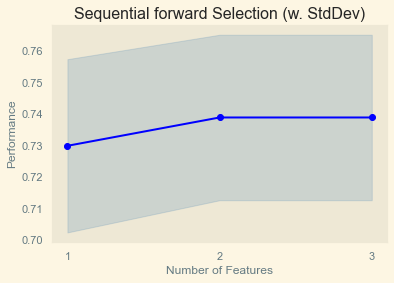

In [191]:
# Plot graph showing the selection results 

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

#plt.ylim([0, 0.2])
plt.title('Sequential forward Selection (w. StdDev)')
plt.grid()
plt.show()

## 13. AutoML - Pycaret

In [192]:
import scikitplot as skplt

In [193]:
df_unit_u_pr.shape

(24731, 10)

In [194]:
data = df_unit_u_pr.sample(frac=0.9, random_state=786)
data_unseen = df_unit_u_pr.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (22258, 10)
Unseen Data For Predictions: (2473, 10)


In [195]:
from pycaret.regression import *
exp_reg101 = setup(data = df_unit_u_pr, target = 'price', session_id=123, fold_shuffle=True)

,Description,Value
0,session_id,123
1,Target,price
2,Original Data,"(24731, 10)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(17311, 14)"


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

In [196]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,113980.6845,153139792253.4803,384524.3653,0.9211,0.0934,0.0517,0.2610
et,Extra Trees Regressor,109293.9892,153014000377.3509,382803.9729,0.9208,0.0939,0.0503,0.3010
xgboost,Extreme Gradient Boosting,137721.9730,154597715134.6325,386042.9937,0.9207,0.1030,0.0677,0.2010
catboost,CatBoost Regressor,153298.5351,184832816836.9942,420860.7693,0.9039,0.1101,0.0754,1.0630
gbr,Gradient Boosting Regressor,202764.5752,207615248189.9753,452768.5350,0.8912,0.1420,0.1030,0.1130
lightgbm,Light Gradient Boosting Machine,167345.7688,260368132306.2338,492162.2221,0.8769,0.1180,0.0811,0.0720
dt,Decision Tree Regressor,128073.0251,242887894052.0810,482499.4747,0.8719,0.1141,0.0571,0.0120
knn,K Neighbors Regressor,168072.8333,377347008449.9654,603785.5189,0.8096,0.1277,0.0708,0.0220
lr,Linear Regression,348796.9013,461069328437.7037,675241.8102,0.7569,0.2440,0.1870,0.4970
lasso,Lasso Regression,348796.5527,461068739576.7086,675241.3590,0.7569,0.2440,0.1870,0.4100


### Random Forest Regressor

In [197]:
# create a model
rf = create_model('rf')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,110180.6948,163996882290.4818,404965.2853,0.9009,0.0862,0.0483
1,117085.6109,183799928734.2616,428718.9391,0.9484,0.0882,0.0495
2,96223.2770,67336762951.7385,259493.2811,0.9529,0.0825,0.0478
3,123216.1163,267489207403.7434,517193.5879,0.8593,0.0974,0.0532
4,111243.9842,92153634675.4858,303568.1714,0.9323,0.0941,0.0532
5,114251.4352,157601050421.2330,396989.9878,0.9160,0.0982,0.0537
6,105051.6822,104649050485.0929,323495.0548,0.9328,0.0938,0.0503
7,127950.3759,213350468609.4251,461898.7645,0.9054,0.1013,0.0554
8,114942.4247,153263235007.3176,391488.4864,0.9053,0.0981,0.0523
9,119661.2438,127757701956.0234,357432.0942,0.9580,0.0939,0.0531


In [198]:
# predict on hold-out
predict_model(rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,112260.9825,125268474127.7898,353932.8667,0.9279,0.0918,0.0510


,area,floorRange,noOfUnits,typeOfSale,propertyType,district,typeOfArea,marketSegment,Year_0,Year_1,Year_2,Year_3,Year_4,Year_5,price,Label
0,105.0,4,1,1,1,3,1,2,1.0,0.0,0.0,0.0,0.0,0.0,1888000,1.869351e+06
1,104.0,2,1,1,0,5,1,2,0.0,0.0,0.0,0.0,1.0,0.0,2171000,2.103967e+06
2,42.0,1,1,1,0,5,1,1,0.0,0.0,1.0,0.0,0.0,0.0,699000,7.045905e+05
3,64.0,7,1,1,0,3,1,2,0.0,0.0,1.0,0.0,0.0,0.0,1320000,1.336833e+06
4,85.0,1,1,1,0,3,1,2,0.0,1.0,0.0,0.0,0.0,0.0,1571100,1.535831e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7415,48.0,3,1,1,0,5,1,2,0.0,0.0,0.0,0.0,1.0,0.0,980000,9.812124e+05
7416,66.0,7,1,1,1,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,944000,9.547628e+05
7417,109.0,7,1,3,0,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0,2854088,2.975457e+06
7418,122.0,4,1,3,1,3,1,2,0.0,0.0,1.0,0.0,0.0,0.0,1990000,2.305406e+06


### Gradient Boosting Regressor

In [199]:
# create a model
gbr = create_model('gbr')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,201486.0510,207705547534.0184,455747.2408,0.8745,0.1415,0.1024
1,200035.8824,229569595938.9336,479134.2150,0.9355,0.1384,0.0996
2,190406.6503,159685806822.0163,399607.0655,0.8884,0.1403,0.1021
3,210013.4752,278674604469.6634,527896.3956,0.8534,0.1422,0.1025
4,206518.1669,151778608535.9551,389587.7418,0.8885,0.1456,0.1078
5,196744.9226,231125640330.6200,480755.2811,0.8768,0.1370,0.0991
6,187757.8427,132013277765.3793,363336.3150,0.9152,0.1369,0.0995
7,212589.9782,264331372264.4174,514131.6682,0.8828,0.1458,0.1043
8,206710.6211,223190614821.5288,472430.5397,0.8621,0.1429,0.1045
9,215382.1614,198077413417.2210,445058.8876,0.9348,0.1493,0.1087


In [200]:
# predict on hold-out
predict_model(gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,200795.9025,174881192821.8154,418187.9874,0.8993,0.1378,0.1008


,area,floorRange,noOfUnits,typeOfSale,propertyType,district,typeOfArea,marketSegment,Year_0,Year_1,Year_2,Year_3,Year_4,Year_5,price,Label
0,105.0,4,1,1,1,3,1,2,1.0,0.0,0.0,0.0,0.0,0.0,1888000,1.878569e+06
1,104.0,2,1,1,0,5,1,2,0.0,0.0,0.0,0.0,1.0,0.0,2171000,2.001312e+06
2,42.0,1,1,1,0,5,1,1,0.0,0.0,1.0,0.0,0.0,0.0,699000,7.689429e+05
3,64.0,7,1,1,0,3,1,2,0.0,0.0,1.0,0.0,0.0,0.0,1320000,1.413352e+06
4,85.0,1,1,1,0,3,1,2,0.0,1.0,0.0,0.0,0.0,0.0,1571100,1.662165e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7415,48.0,3,1,1,0,5,1,2,0.0,0.0,0.0,0.0,1.0,0.0,980000,9.740498e+05
7416,66.0,7,1,1,1,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,944000,9.556090e+05
7417,109.0,7,1,3,0,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0,2854088,2.501963e+06
7418,122.0,4,1,3,1,3,1,2,0.0,0.0,1.0,0.0,0.0,0.0,1990000,2.105800e+06


### Linear Regression

In [201]:
# create a model
lr = create_model('lr')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,335851.5600,343779360249.1288,586327.0079,0.7923,0.2518,0.1873
1,355727.7229,545988845339.9857,738910.5801,0.8467,0.2349,0.1894
2,340050.2762,416903376002.0582,645680.5526,0.7086,0.2383,0.1881
3,353196.6922,500173735878.5414,707229.6203,0.7369,0.2479,0.1854
4,340168.0100,337166562106.2708,580660.4534,0.7523,0.2377,0.1869
5,341930.6047,470021018117.2383,685580.7889,0.7495,0.2309,0.1819
6,338239.5403,417938003139.8844,646481.2473,0.7314,0.2347,0.1828
7,366330.9622,672852093147.6389,820275.6202,0.7018,0.2552,0.1844
8,365403.6562,528599371719.0937,727048.3971,0.6735,0.2602,0.1965
9,351069.9885,377270918677.1970,614223.8343,0.8759,0.2484,0.1877


In [202]:
# predict on hold-out
predict_model(lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,344137.1541,404307515957.9872,635851.8035,0.7673,0.2396,0.1848


,area,floorRange,noOfUnits,typeOfSale,propertyType,district,typeOfArea,marketSegment,Year_0,Year_1,Year_2,Year_3,Year_4,Year_5,price,Label
0,105.0,4,1,1,1,3,1,2,1.0,0.0,0.0,0.0,0.0,0.0,1888000,1.708071e+06
1,104.0,2,1,1,0,5,1,2,0.0,0.0,0.0,0.0,1.0,0.0,2171000,1.996152e+06
2,42.0,1,1,1,0,5,1,1,0.0,0.0,1.0,0.0,0.0,0.0,699000,8.798429e+05
3,64.0,7,1,1,0,3,1,2,0.0,0.0,1.0,0.0,0.0,0.0,1320000,1.545181e+06
4,85.0,1,1,1,0,3,1,2,0.0,1.0,0.0,0.0,0.0,0.0,1571100,1.518507e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7415,48.0,3,1,1,0,5,1,2,0.0,0.0,0.0,0.0,1.0,0.0,980000,1.092065e+06
7416,66.0,7,1,1,1,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,944000,1.185677e+06
7417,109.0,7,1,3,0,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0,2854088,2.759288e+06
7418,122.0,4,1,3,1,3,1,2,0.0,0.0,1.0,0.0,0.0,0.0,1990000,1.985346e+06
